# Hierarchical Clustering with K-means

## Steps:

1. The algorithm starts by firs peforming K-means clustering on the entire dataset.

2. Then, the clusters are merged in a hierarchical manner based on some similarity (e.g. distance or correlation etc.)

3. We stop when the desired number of clusters are obtained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:

# Define a function to calculate the distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define the Hierarchical K-means algorithm - implemented with repetitive merge of clusters (agglomerative)
def hierarchical_kmeans(X, k):
    # Initialize the cluster centroids to be the data points themselves
    centroids = X.copy()
    n = centroids.shape[0]
    labels = np.zeros(n)
    
    # Perform hierarchical clustering
    while n > k:
        # Calculate the pairwise distances between the centroids
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(i+1, n):
                distances[i,j] = euclidean_distance(centroids[i], centroids[j])
        
        # Find the indices of the closest pair of centroids
        idx = np.unravel_index(np.argmin(distances), distances.shape)
        i, j = idx
        
        # Merge the two clusters corresponding to the closest pair of centroids
        new_centroid = (centroids[i] + centroids[j])/2.0
        centroids = np.delete(centroids, j, axis=0)
        centroids[i] = new_centroid
        
        # Update the labels of the points
        for x_idx, x in enumerate(X):
            distances_to_centroids = [euclidean_distance(x, centroid) for centroid in centroids]
            labels[x_idx] = np.argmin(distances_to_centroids)
        
        # Decrement the number of clusters
        n -= 1
        
    return labels


## Generate Data

In [7]:
# Generate some sample data
np.random.seed(0)
X = np.random.rand(20, 2)

## Apply Hierarchical Clustering

In [13]:
k = 3
labels_h = hierarchical_kmeans(X, k)
labels_h

array([0., 1., 0., 0., 2., 1., 0., 1., 0., 2., 2., 0., 0., 0., 1., 0., 1.,
       0., 1., 2.])

# Plot the Dendrogram

In [9]:
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import dendrogram, linkage


In [10]:
dist_matrix = squareform(pdist(X))
linkage_matrix = linkage(dist_matrix, method='ward')

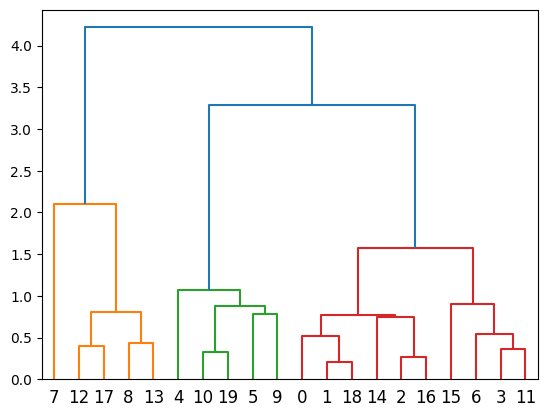

In [11]:
dendrogram(linkage_matrix)
plt.show()

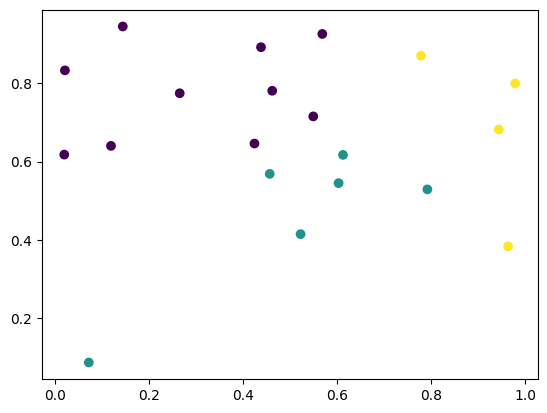

In [12]:
# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels_h)
plt.show()